# Testing weighted VMF models

This jupyter notebook is to test the ability of weighted VMF model compared to other emission models when fitting the functional task-evoked data.
The simultion is from a model where each voxel has a mean direction with signal strength s_i + Isotropic Gaussian noise. we compare different emission models. For the wVMF we currently only have the version that considers w to change the number of observations. 

* VMF: Van Mises-Fisher 
* wVMF-t2: Uses the true signal magnitude for each voxel to weight the observation 
* wVMF-l2: Uses the square length of the data vector for weighting. 



In [1]:
# general import packages
import numpy as np
import torch as pt
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sb

# for testing and evaluating models
from test_wVMF_jd import *
from generativeMRF.full_model import FullMultiModel
from generativeMRF.arrangements import ArrangeIndependent, expand_mn, sample_multinomial
from generativeMRF.emissions import MixGaussianExp, MixVMF, wMixVMF
import generativeMRF.evaluation as ev


/Users/jdiedrichsen/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Discrete signal distribution (50% noise , 50% signal)

/Users/jdiedrichsen/Python/generativeMRF/full_model.py:479: UserWarning: Likelihood decreased - terminating on iteration 14
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')


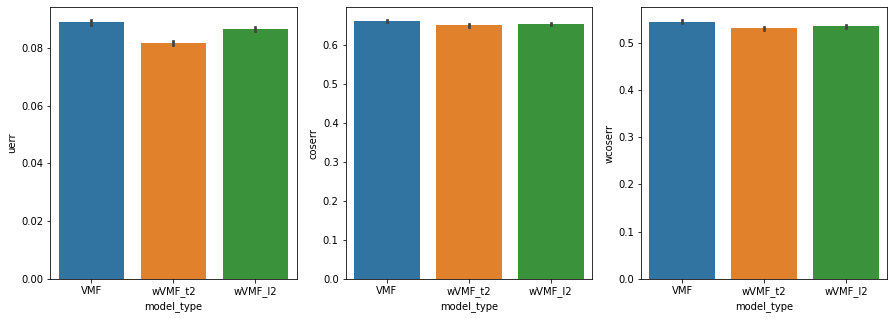

In [27]:
sim_param={'K':10,
            'N':20,
            'P':100,
            'sigma2':0.05,
            'signal_distrib':'discrete',
            'signal_param':[0.5,0.5]}
results = do_sim(num_sim=50,verbose=False,**sim_param)
plot_results(results)

### Uniform - all voxels have the same signal strength

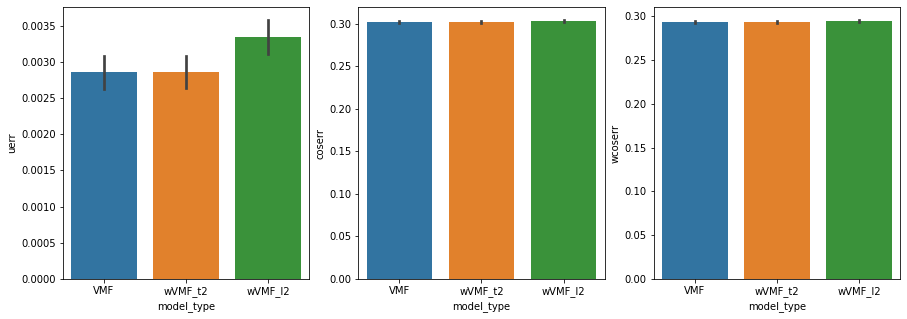

In [11]:
sim_param={'K':10,
            'N':20,
            'P':100,
            'sigma2':0.05,
            'signal_distrib':'uniform',
            'signal_param':[0,1]}
results = do_sim(num_sim=50,verbose=False,**sim_param)
plot_results(results)

### Exponential Signal distribution


/Users/jdiedrichsen/Python/generativeMRF/full_model.py:479: UserWarning: Likelihood decreased - terminating on iteration 17
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')
/Users/jdiedrichsen/Python/generativeMRF/full_model.py:479: UserWarning: Likelihood decreased - terminating on iteration 24
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')
/Users/jdiedrichsen/Python/generativeMRF/full_model.py:479: UserWarning: Likelihood decreased - terminating on iteration 12
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')
/Users/jdiedrichsen/Python/generativeMRF/full_model.py:479: UserWarning: Likelihood decreased - terminating on iteration 7
  warnings.warn(f'Likelihood decreased - terminating on iteration {i}')


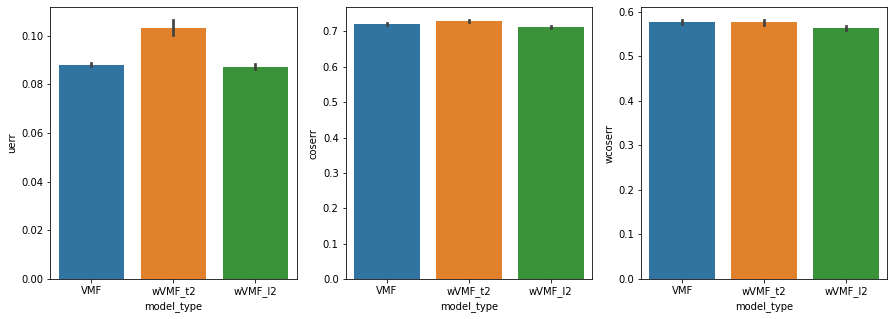

In [2]:
sim_param={'K':10,
            'N':20,
            'P':100,
            'sigma2':0.05,
            'signal_distrib':'exp',
            'signal_param':2.0}
results = do_sim(num_sim=50,verbose=False,**sim_param)
plot_results(results)

What is going on? A wVMF model with the true signal strength should always perform better thant the straight-up VMF model, no? How it is that the wVMF_l2 performs similarily? Is this disadvantage consistent?

(array([19., 14.,  0.,  7.,  2.,  4.,  1.,  0.,  0.,  3.]),
 array([0.00476713, 0.00902084, 0.01327456, 0.01752828, 0.02178199,
        0.02603571, 0.03028942, 0.03454314, 0.03879686, 0.04305057,
        0.04730429]),
 <BarContainer object of 10 artists>)

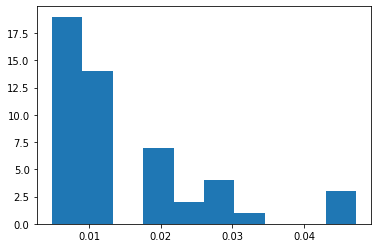

In [5]:
A=results.pivot(index='sim',columns='model_type')
plt.hist(A['uerr']['wVMF_t2']-A['uerr']['VMF'])